<a href="https://colab.research.google.com/github/AlbertoBircoci/GettingAndCleaningDataProject/blob/main/Proiect_Econometria_Seriilor_de_timp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proiect Econometria Seriilor de **timp**




# Problema 1

Seria de timp INTC (Intel Corporation)

Seria analizată reprezintă evoluția prețului de închidere al acțiunii Intel Corporation (simbol: INTC), una dintre cele mai mari companii din lume specializate în semiconductori și procesoare pentru calculatoare.

Datele au fost descărcate din Yahoo Finance folosind pachetul yfinance, pentru perioada 01.01.2020 – 20.10.2025, cu frecvență zilnică.

/tmp/ipython-input-3395206983.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("INTC", start="2020-01-01", end="2025-10-20")
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open    Volume
Ticker           INTC       INTC       INTC       INTC      INTC
Date                                                            
2020-01-02  53.666473  53.781146  53.119577  53.137220  18056000
2020-01-03  53.013721  53.542979  52.757917  52.757917  15293900
2020-01-06  52.863766  53.101931  52.334512  52.563854  17755200
2020-01-07  51.981678  52.749097  51.946394  52.731455  21876100
2020-01-08  52.016949  52.325679  51.620007  51.946380  23133500


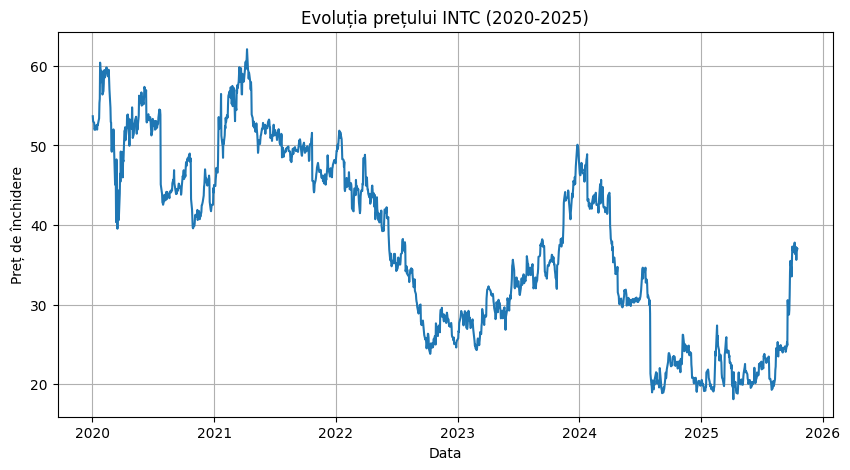

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

data = yf.download("INTC", start="2020-01-01", end="2025-10-20")

print(data.head())

plt.figure(figsize=(10,5))
plt.plot(data["Close"])
plt.title("Evoluția prețului INTC (2020-2025)")
plt.xlabel("Data")
plt.ylabel("Preț de închidere")
plt.grid(True)
plt.show()


Codul de mai jos calculează două filtre de netezire pe seria INTC:

SMA(20): media aritmetică a ultimelor 20 de închideri → linie mai „lentă”, arată trendul de scurt–mediu termen.

EMA(c=0.1): media exponențială cu pondere 0.1 pe ultima observație → linie mai „rapidă”, reacționează mai repede la schimbări.

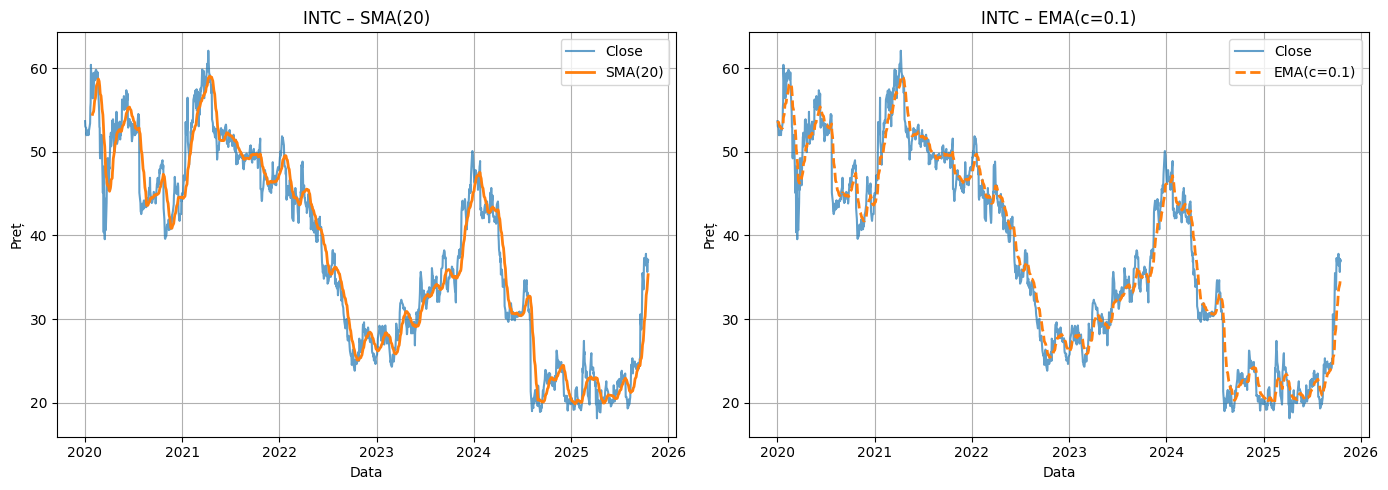

In [7]:
data["SMA_20"] = data["Close"].rolling(window=20).mean()
data["EMA_0.1"] = data["Close"].ewm(alpha=0.1, adjust=False).mean()

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Grafic 1: Close + SMA(20)
axes[0].plot(data["Close"], label="Close", alpha=0.7)
axes[0].plot(data["SMA_20"], label="SMA(20)", linewidth=2)
axes[0].set_title("INTC – SMA(20)")
axes[0].set_xlabel("Data")
axes[0].set_ylabel("Preț")
axes[0].grid(True)
axes[0].legend()

# Grafic 2: Close + EMA(c=0.1)
axes[1].plot(data["Close"], label="Close", alpha=0.7)
axes[1].plot(data["EMA_0.1"], label="EMA(c=0.1)", linewidth=2, linestyle="--")
axes[1].set_title("INTC – EMA(c=0.1)")
axes[1].set_xlabel("Data")
axes[1].set_ylabel("Preț")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


Numarul mare de date face sa fie greu folosirea acelor indicatorii pentru o analiza, astfel am recreat graficul doar cu ultimele 100 de date din dataset

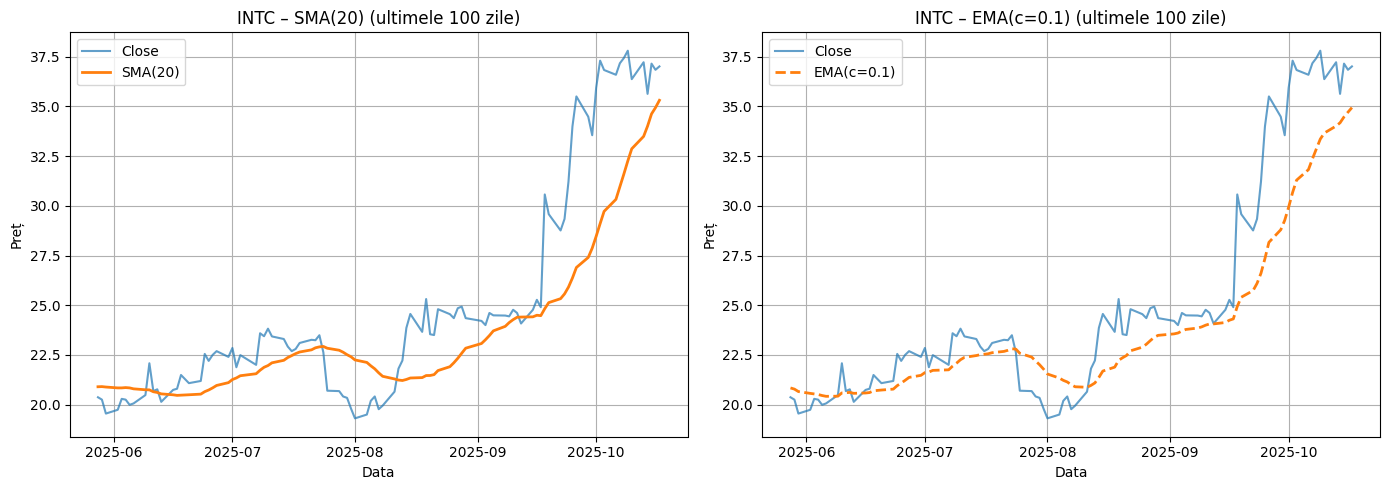

In [8]:
# Ultimele 100 de zile
recent = data.tail(100)

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Grafic 1: Close + SMA(20)
axes[0].plot(recent["Close"], label="Close", alpha=0.7)
axes[0].plot(recent["SMA_20"], label="SMA(20)", linewidth=2)
axes[0].set_title("INTC – SMA(20) (ultimele 100 zile)")
axes[0].set_xlabel("Data")
axes[0].set_ylabel("Preț")
axes[0].grid(True)
axes[0].legend()

# Grafic 2: Close + EMA(c=0.1)
axes[1].plot(recent["Close"], label="Close", alpha=0.7)
axes[1].plot(recent["EMA_0.1"], label="EMA(c=0.1)", linewidth=2, linestyle="--")
axes[1].set_title("INTC – EMA(c=0.1) (ultimele 100 zile)")
axes[1].set_xlabel("Data")
axes[1].set_ylabel("Preț")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


In ultimele 100 de zile, trendul general este ascendent, iar ambele filtre oferă semnale de cumpărare.

Analiza a fost refăcută pe ultimul an de date (365 de observații).
Au fost utilizați doi indicatori de tip SMA și doi de tip EMA:

SMA(30) – urmărește tendința pe termen scurt–mediu;

SMA(50) – potrivit pentru identificarea trendurilor stabile pe termen mai lung.

EMA(12) – bun pentru semnale de momentum sau intrări timpurii.

EMA(26) – mai lent, folosit pentru confirmarea trendurilor.

/tmp/ipython-input-19055823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_year["SMA_30"] = last_year["Close"].rolling(30).mean()
/tmp/ipython-input-19055823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_year["SMA_50"] = last_year["Close"].rolling(50).mean()
/tmp/ipython-input-19055823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

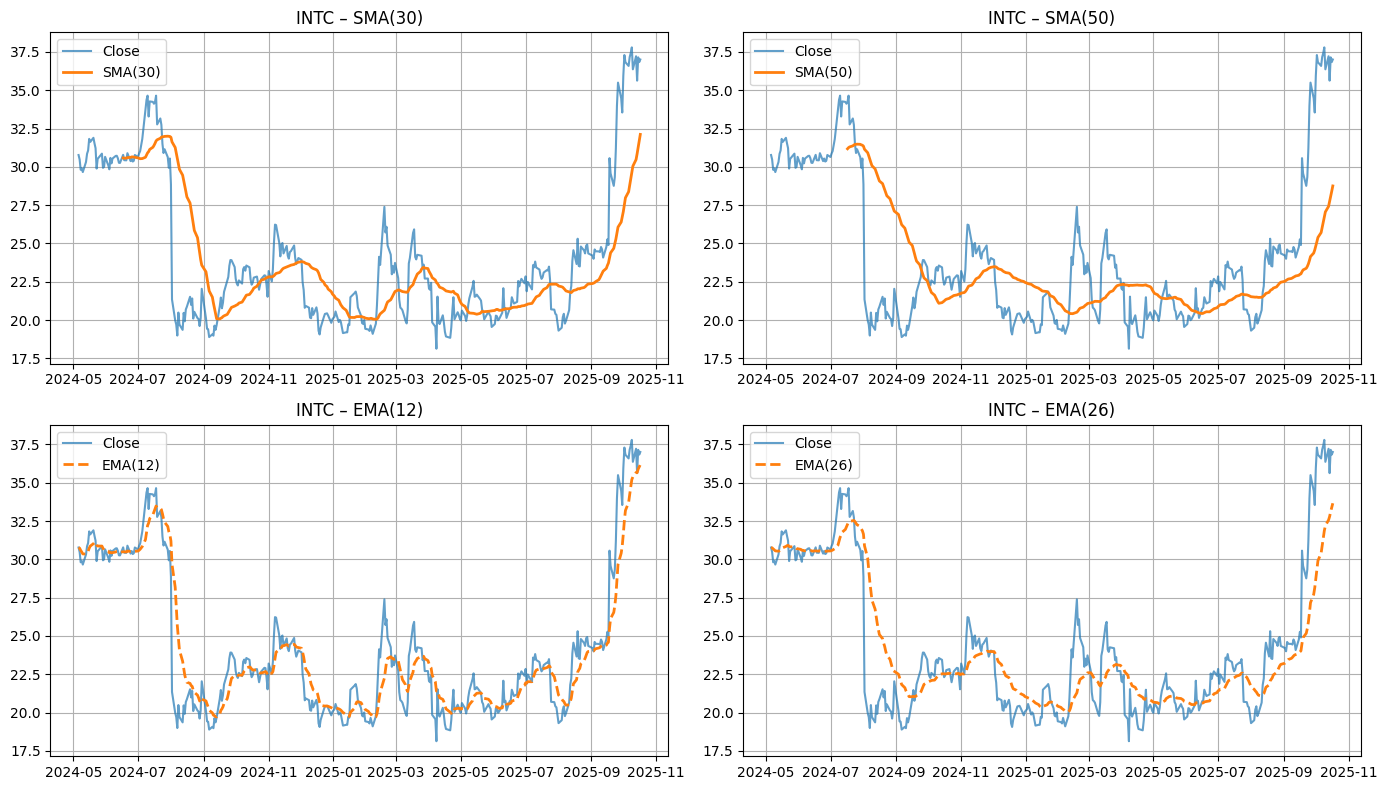

In [12]:
last_year = data.tail(365)
last_year["SMA_30"] = last_year["Close"].rolling(30).mean()
last_year["SMA_50"] = last_year["Close"].rolling(50).mean()
last_year["EMA_12"] = last_year["Close"].ewm(span=12, adjust=False).mean()
last_year["EMA_26"] = last_year["Close"].ewm(span=26, adjust=False).mean()

fig, axes = plt.subplots(2, 2, figsize=(14,8))

# SMA(20)
axes[0,0].plot(last_year["Close"], label="Close", alpha=0.7)
axes[0,0].plot(last_year["SMA_30"], label="SMA(30)", linewidth=2)
axes[0,0].set_title("INTC – SMA(30)")
axes[0,0].grid(True); axes[0,0].legend()

# SMA(50)
axes[0,1].plot(last_year["Close"], label="Close", alpha=0.7)
axes[0,1].plot(last_year["SMA_50"], label="SMA(50)", linewidth=2)
axes[0,1].set_title("INTC – SMA(50)")
axes[0,1].grid(True); axes[0,1].legend()

# EMA(12)
axes[1,0].plot(last_year["Close"], label="Close", alpha=0.7)
axes[1,0].plot(last_year["EMA_12"], label="EMA(12)", linewidth=2, linestyle="--")
axes[1,0].set_title("INTC – EMA(12)")
axes[1,0].grid(True); axes[1,0].legend()

# EMA(26)
axes[1,1].plot(last_year["Close"], label="Close", alpha=0.7)
axes[1,1].plot(last_year["EMA_26"], label="EMA(26)", linewidth=2, linestyle="--")
axes[1,1].set_title("INTC – EMA(26)")
axes[1,1].grid(True); axes[1,1].legend()

plt.tight_layout()
plt.show()


# Problema 2

În această etapă se analizează PIB-ul real al Portugaliei, cu frecvență trimestrială, pentru perioada 2000–2025.
Datele sunt descărcate din baza de date FRED (Federal Reserve Economic Data), codul seriei fiind CLVMNACSCAB1GQPT.

Seria reprezintă PIB în volum „chain-linked”, adică valori reale ajustate pentru inflație (prețuri constante 2010).

            CLVMNACSCAB1GQPT
DATE                        
2024-04-01           52156.0
2024-07-01           52256.9
2024-10-01           52883.1
2025-01-01           52729.8
2025-04-01           53076.4


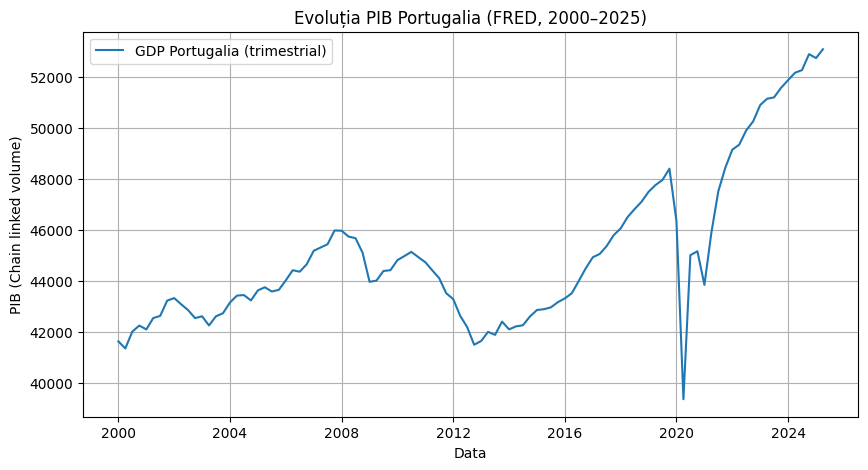

In [14]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt

start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 10, 1)

# Importă PIB trimestrial Portugalia de la FRED
gdp = web.DataReader("CLVMNACSCAB1GQPT", "fred", start, end)

print(gdp.tail())

plt.figure(figsize=(10,5))
plt.plot(gdp, label="GDP Portugalia (trimestrial)")
plt.title("Evoluția PIB Portugalia (FRED, 2000–2025)")
plt.xlabel("Data")
plt.ylabel("PIB (Chain linked volume)")
plt.grid(True)
plt.legend()
plt.show()


Seria PIB a fost descompusă pe componente folosind un model aditiv cu perioadă de 4 trimestre (un an).
Rezultatul arată:

Trendul – evoluția de lungă durată a economiei;

Sezonalitatea – variațiile regulate între trimestre ;

Reziduurile – fluctuațiile neregulate, neexplicate de celelalte componente.

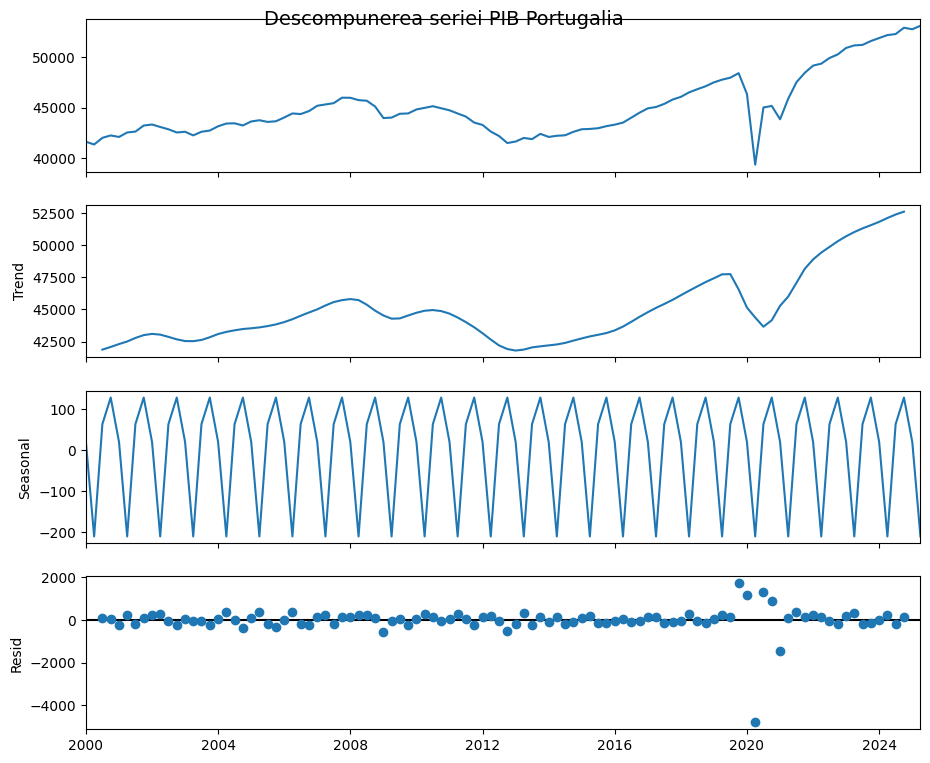

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomp = seasonal_decompose(gdp, model='additive', period=4)
fig = decomp.plot()
fig.set_size_inches(10, 8)
plt.suptitle("Descompunerea seriei PIB Portugalia", fontsize=14)
plt.show()


Componenta sezonieră (graficul de sus)
Prezintă un pattern regulat și repetitiv la fiecare 4 trimestre, ceea ce indică sezonalitate stabilă:
– valorile tind să crească într-un trimestru (de obicei T4) și să scadă în altul (T1), reflectând ritmul economic anual – de exemplu, activitate mai ridicată la final de an.
– amplitudinea constantă arată că sezonalitatea s-a menținut relativ similară de-a lungul anilor.

Componenta reziduală (graficul de jos)
Reprezintă abaterile neexplicate de trend și sezonalitate.
– Se observă oscilații reduse după 2008, semn că economia s-a stabilizat după criza financiară globală.
– În jurul anului 2020, apar deviații mari negative și pozitive, cauzate de criza COVID-19, care a produs o contracție economică bruscă urmată de revenire.

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)

  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)



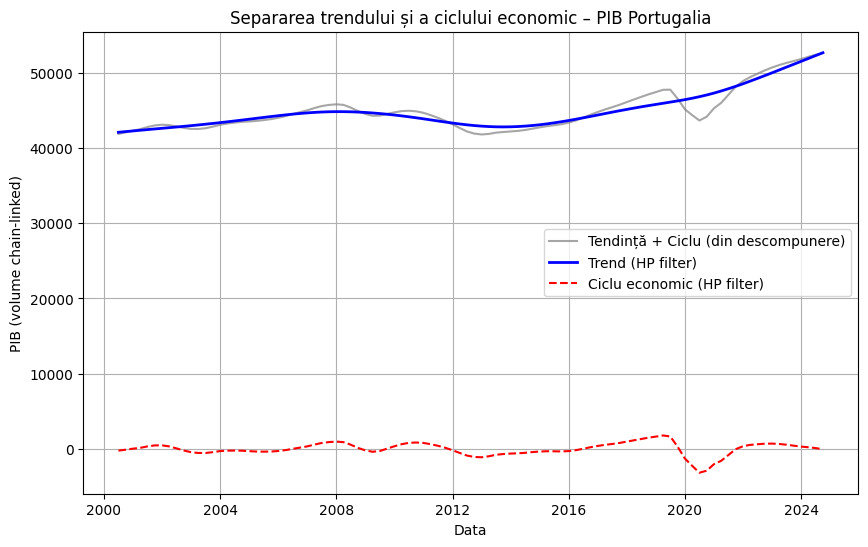

In [40]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt

gdp_trendcycle = decomp.trend.dropna()
cycle, trend = hpfilter(gdp_trendcycle, lamb=1600)

# Grafic: Trend și Ciclu
plt.figure(figsize=(10,6))
plt.plot(gdp_trendcycle, label="Tendință + Ciclu (din descompunere)", color="gray", alpha=0.7)
plt.plot(trend, label="Trend (HP filter)", color="blue", linewidth=2)
plt.plot(cycle, label="Ciclu economic (HP filter)", color="red", linestyle="--")
plt.title("Separarea trendului și a ciclului economic – PIB Portugalia")
plt.xlabel("Data")
plt.ylabel("PIB (volume chain-linked)")
plt.grid(True)
plt.legend()
plt.show()


Analiza spectrală (periodograma) arată puterea variabilității ciclice în funcție de durata ciclurilor economice.
Vârfurile din grafic indică perioade dominante de oscilație în seria PIB-ului.

/tmp/ipython-input-3571574192.py:9: RuntimeWarning: divide by zero encountered in divide
  period_years = 1 / (freqs * 4)  # 4 trimestre într-un an


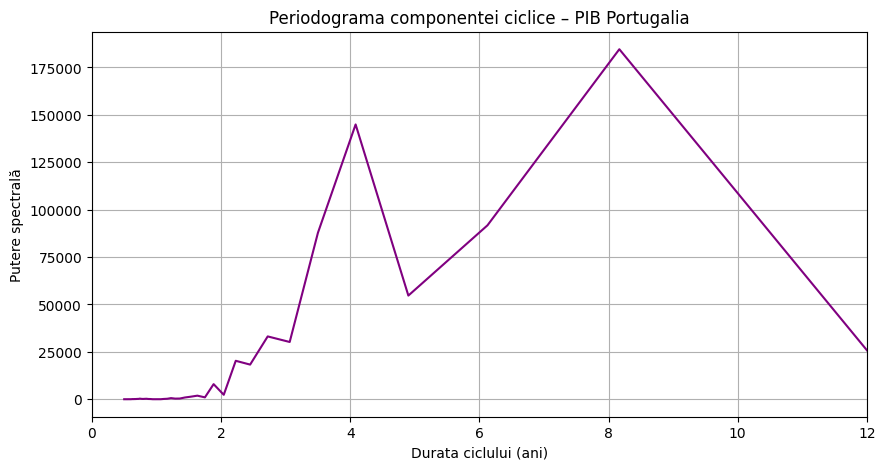

In [17]:
import numpy as np
from scipy.signal import periodogram
import matplotlib.pyplot as plt

freqs, power = periodogram(cycle.dropna(), scaling='spectrum')
period_years = 1 / (freqs * 4)  # 4 trimestre într-un an

# Grafic
plt.figure(figsize=(10,5))
plt.plot(period_years, power, color='purple')
plt.title("Periodograma componentei ciclice – PIB Portugalia")
plt.xlabel("Durata ciclului (ani)")
plt.ylabel("Putere spectrală")
plt.grid(True)
plt.xlim(0, 12)
plt.show()


Se observă un vârf major în jurul 4 ani, ceea ce sugerează un ciclu economic tipic de aproximativ 4 ani, adesea asociat cu fazele de expansiune și contracție economică obișnuite.

Un al doilea vârf, mai slab, în jur de 8 ani, poate indica existența unor cicluri economice mai lungi, de tip investițional sau structural.

Puterea mai mare a acestor frecvențe confirmă că variațiile PIB-ului portughez nu sunt aleatorii, ci urmează modele recurente pe termen mediu.

Pentru previzionarea evoluției PIB-ului Portugaliei s-au testat două tipuri de modele:

ARIMA (AutoRegressive Integrated Moving Average) – model statistic clasic, care combină autoregresia și media mobilă pentru a surprinde dependențele temporale și trendurile liniare din serie.

LSTM (Long Short-Term Memory) – rețea neuronală recurentă, capabilă teoretic să învețe relații complexe și tipare non-liniare în serii de timp.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)



Model ARIMA(2,1,1)
RMSE pe setul de test: 4774.106


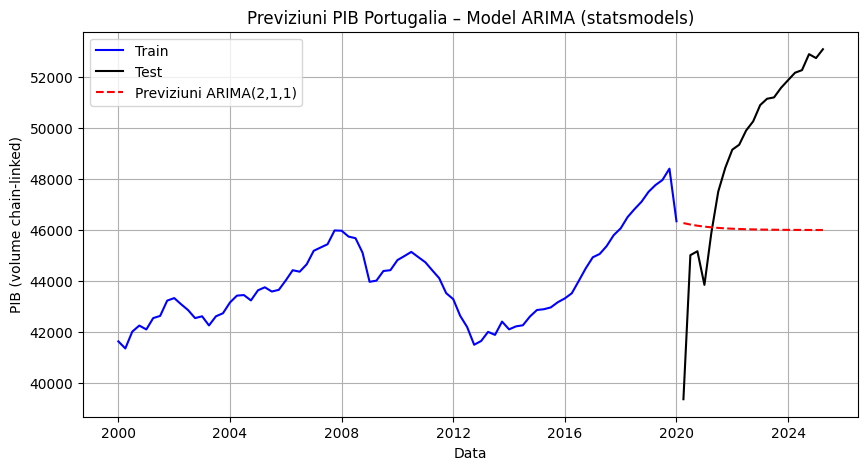

In [41]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

gdp_clean = gdp.dropna()

# Împărțire în train/test (80/20)
split = int(len(gdp_clean) * 0.8)
train, test = gdp_clean.iloc[:split], gdp_clean.iloc[split:]

# Model ARIMA
model = ARIMA(train, order=(1,1,1))  # (p,d,q)
fitted = model.fit()

forecast = fitted.forecast(steps=len(test))
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print("Model ARIMA(2,1,1)")
print(f"RMSE pe setul de test: {rmse:.3f}")

# Grafic
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Train", color="blue")
plt.plot(test.index, test, label="Test", color="black")
plt.plot(test.index, forecast, label="Previziuni ARIMA(2,1,1)", color="red", linestyle="--")
plt.title("Previziuni PIB Portugalia – Model ARIMA (statsmodels)")
plt.xlabel("Data")
plt.ylabel("PIB (volume chain-linked)")
plt.legend()
plt.grid(True)
plt.show()


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

  super().__init__(**kwargs)



RMSE LSTM autoregresiv pe setul de test: 5437.584


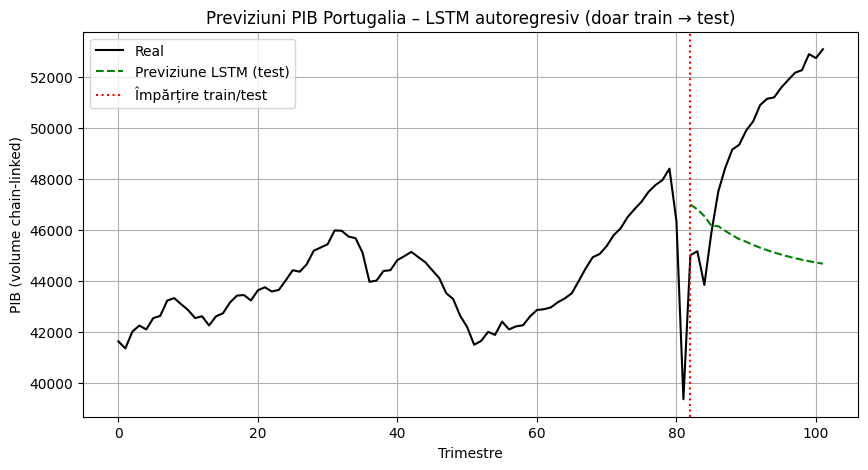

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

gdp_values = gdp.dropna().values.reshape(-1, 1)

# Normalizare
scaler = MinMaxScaler()
gdp_scaled = scaler.fit_transform(gdp_values)
n_steps = 4

# Funcție pentru crearea secvențelor
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(gdp_scaled, n_steps)

split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

model = Sequential([
    LSTM(50, activation='tanh', input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=100, verbose=0)
predictions = []
last_seq = X_train[-1]

for i in range(len(y_test)):
    pred = model.predict(last_seq.reshape(1, n_steps, 1), verbose=0)
    predictions.append(pred[0,0])
    last_seq = np.append(last_seq[1:], pred).reshape(n_steps, 1)

y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 6️⃣ RMSE și grafic
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"RMSE LSTM autoregresiv pe setul de test: {rmse:.3f}")

plt.figure(figsize=(10,5))
plt.plot(range(len(gdp_values)), scaler.inverse_transform(gdp_scaled), label="Real", color="black")
plt.plot(range(split + n_steps, split + n_steps + len(y_pred_inv)), y_pred_inv,
         label="Previziune LSTM (test)", color="green", linestyle="--")
plt.axvline(split + n_steps, color="red", linestyle=":", label="Împărțire train/test")
plt.title("Previziuni PIB Portugalia – LSTM autoregresiv ")
plt.xlabel("Trimestre")
plt.ylabel("PIB (volume chain-linked)")
plt.legend()
plt.grid(True)
plt.show()


Interpretare rezultate:
Ambele modele au avut performanțe slabe 😅 — predicțiile nu au reușit să urmărească trendul real al PIB-ului.
Principalul motiv: împărțirea train–test s-a suprapus exact peste scăderea bruscă din perioada crizei COVID-19, un eveniment excepțional pe care modelele, antrenate pe date „normale”, nu l-au putut anticipa.

Aceasta evidențiază limitele acestor abordări: ARIMA este rigid la șocuri bruște, iar LSTM are nevoie de mai multe date și ajustări fine pentru a reacționa corect la astfel de schimbări structurale. Cu siguranta insa ajustarea datasetului astfel incat trainul sa intre doar dupa revenirea din criza ar aduce rezultate destul de bune in ambele cazuri

# Problema 3

WARNING - (py.warnings._showwarnmsg) - /tmp/ipython-input-2163679136.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("INTC", start="2020-01-01", end="2025-10-20")

  data = yf.download("INTC", start="2020-01-01", end="2025-10-20")

[*********************100%***********************]  1 of 1 completed


Primele valori din serie:
Price           Close
Ticker           INTC
Date                 
2020-01-02  53.666473
2020-01-03  53.013721
2020-01-06  52.863766
2020-01-07  51.981678
2020-01-08  52.016949 

Număr total observații: 1457


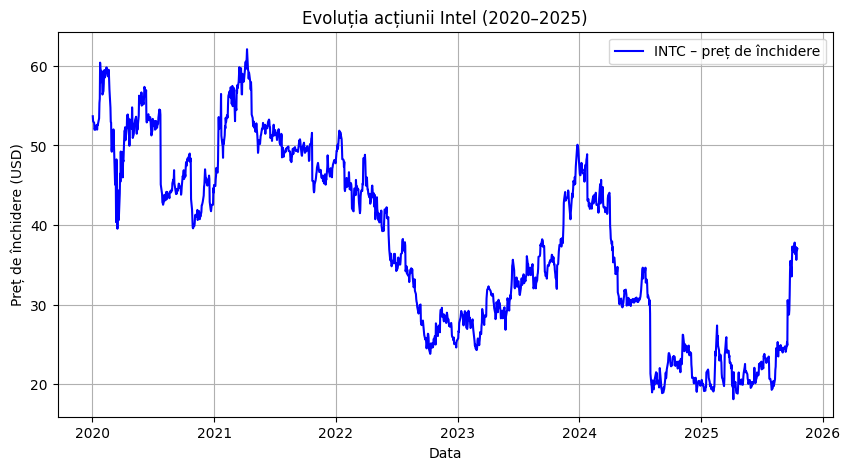

In [32]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

data = yf.download("INTC", start="2020-01-01", end="2025-10-20")
data = data[["Close"]].dropna()

print("Primele valori din serie:")
print(data.head(), "\n")
print("Număr total observații:", len(data))

plt.figure(figsize=(10,5))
plt.plot(data.index, data["Close"], label="INTC – preț de închidere", color="blue")
plt.title("Evoluția acțiunii Intel (2020–2025)")
plt.xlabel("Data")
plt.ylabel("Preț de închidere (USD)")
plt.grid(True)
plt.legend()
plt.show()


Primele 5 rentabilități logaritmice:
Date
2020-01-03   -0.012238
2020-01-06   -0.002833
2020-01-07   -0.016827
2020-01-08    0.000678
2020-01-09    0.005580
Name: LogReturn, dtype: float64 

Exemplu 1: -0.0122 → creștere de aproximativ -1.22%
Exemplu 2: -0.0028 → creștere de aproximativ -0.28%



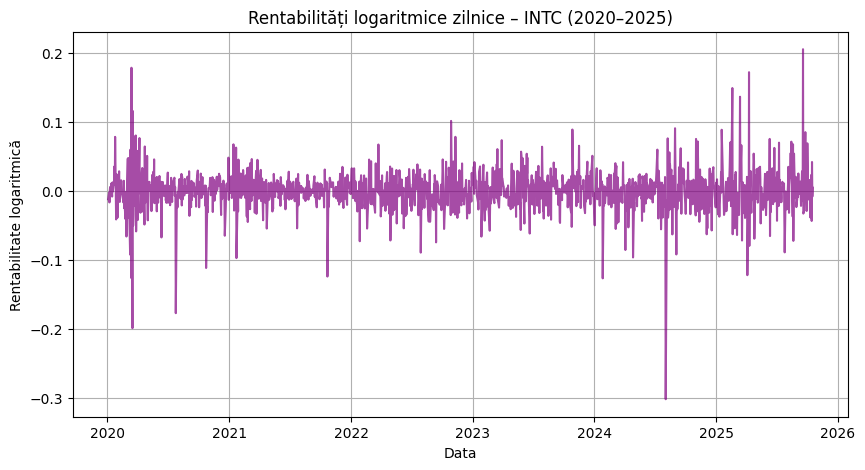

In [33]:
import numpy as np
import matplotlib.pyplot as plt

data["LogReturn"] = np.log(data["Close"] / data["Close"].shift(1))
data = data.dropna()

print("Primele 5 rentabilități logaritmice:")
print(data["LogReturn"].head(), "\n")

print(f"Exemplu 1: {data['LogReturn'].iloc[0]:.4f} → creștere de aproximativ {np.exp(data['LogReturn'].iloc[0]) - 1:.2%}")
print(f"Exemplu 2: {data['LogReturn'].iloc[1]:.4f} → creștere de aproximativ {np.exp(data['LogReturn'].iloc[1]) - 1:.2%}\n")

plt.figure(figsize=(10,5))
plt.plot(data.index, data["LogReturn"], color="purple", alpha=0.7)
plt.title("Rentabilități logaritmice zilnice – INTC (2020–2025)")
plt.xlabel("Data")
plt.ylabel("Rentabilitate logaritmică")
plt.grid(True)
plt.show()


Primele valori arată scăderi mici ale prețului acțiunii Intel la începutul perioadei, de aproximativ –1.2% și –0.3% — adică variații normale de zi cu zi.

În grafic:


Vârfurile mari pozitive sau negative arată perioade cu volatilitate ridicată, adică zile când prețul s-a mișcat puternic.

Se observă alternanțe între perioade calme și perioade agitate

Pe scurt: rentabilitățile zilnice ale INTC variază mult, dar în general rămân mici, iar momentele extreme sunt rare și de scurtă durată.

Statistici descriptive pentru rentabilitățile logaritmice INTC:

count    1456.000000
mean       -0.000255
std         0.029968
min        -0.301896
25%        -0.013864
50%         0.000000
75%         0.013453
max         0.205151
Name: LogReturn, dtype: float64

Asimetrie (Skewness): -0.5634
Turtos (Kurtosis): 13.5203


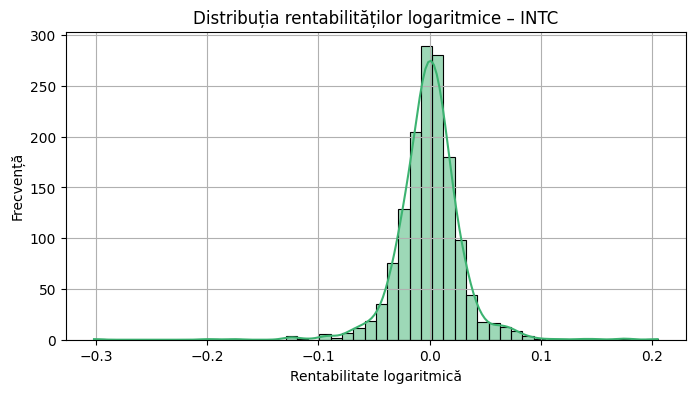

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

desc_stats = data["LogReturn"].describe()
skewness = skew(data["LogReturn"])
kurt = kurtosis(data["LogReturn"])

print("Statistici descriptive pentru rentabilitățile logaritmice INTC:\n")
print(desc_stats)
print(f"\nAsimetrie (Skewness): {skewness:.4f}")
print(f"Turtos (Kurtosis): {kurt:.4f}")

# Grafic histogramă + densitate
plt.figure(figsize=(8,4))
sns.histplot(data["LogReturn"], bins=50, kde=True, color="mediumseagreen")
plt.title("Distribuția rentabilităților logaritmice – INTC")
plt.xlabel("Rentabilitate logaritmică")
plt.ylabel("Frecvență")
plt.grid(True)
plt.show()



Media este aproape de 0 → în medie, randamentele zilnice nu arată o direcție clară (nici creștere, nici scădere).

Deviația standard ≈ 0.03 → volatilitate moderată, adică variații zilnice de aproximativ ±3%.

Asimetrie (–0.56) → distribuția este ușor înclinată spre stânga, deci scăderile mari apar mai des decât creșterile mari.

Turtos (13.5) → valoare mare, ceea ce înseamnă vârf ascuțit și cozi groase, adică zilele extreme (creșteri/scăderi mari) sunt mai frecvente decât într-o distribuție normală.

➡️ Pe scurt: majoritatea randamentelor sunt mici și apropiate de 0, dar ocazional apar mișcări puternice, în special scăderi.

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008919. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)

estimating the model parameters. The scale of y is 0.0008919. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)



                           AR - GARCH Model Results                           
Dep. Variable:              LogReturn   R-squared:                       0.001
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3143.41
Distribution:                  Normal   AIC:                          -6276.82
Method:            Maximum Likelihood   BIC:                          -6250.41
                                        No. Observations:                 1455
Date:                Wed, Nov 05 2025   Df Residuals:                     1453
Time:                        19:54:08   Df Model:                            2
                                   Mean Model                                   
                    coef    std err          t      P>|t|       95.0% Conf. Int.
--------------------------------------------------------------------------------
Const        -1.9665e-04  7.628e-04     -0.258

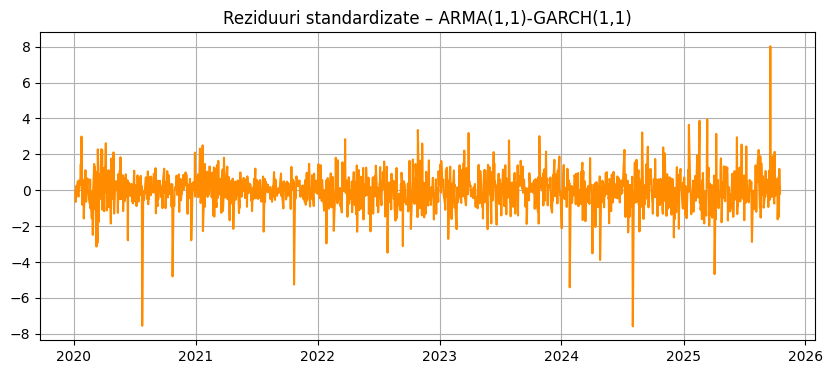


Previziuni pentru următoarele 3 zile:
Ziua 1: media rentabilității = -0.000222, varianța previzionată = 0.00061714
Ziua 2: media rentabilității = -0.000195, varianța previzionată = 0.00074024
Ziua 3: media rentabilității = -0.000196, varianța previzionată = 0.00082295


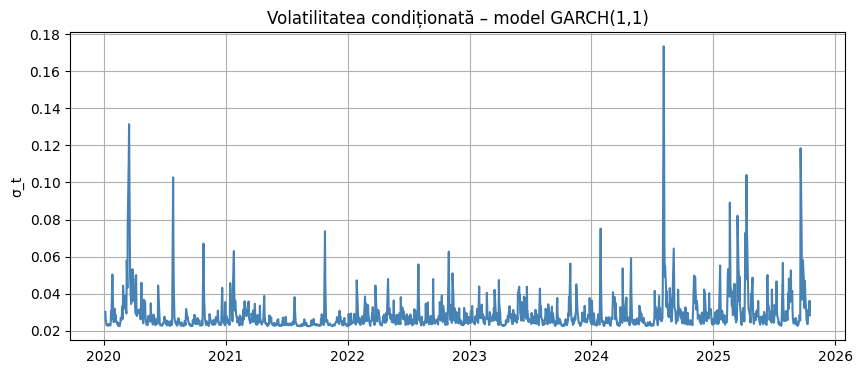

In [43]:
!pip install arch --quiet

from arch import arch_model
import matplotlib.pyplot as plt
import numpy as np

returns = data["LogReturn"].dropna()

model = arch_model(returns, vol="GARCH", p=1, q=1, mean="ARX", lags=1, dist="normal")
res = model.fit(disp="off")

print(res.summary())
plt.figure(figsize=(10,4))
plt.plot(res.std_resid, color="darkorange")
plt.title("Reziduuri standardizate – ARMA(1,1)-GARCH(1,1)")
plt.grid(True)
plt.show()

forecast = res.forecast(horizon=3)
mean_forecast = forecast.mean.iloc[-1].values
var_forecast = forecast.variance.iloc[-1].values

print("\nPreviziuni pentru următoarele 3 zile:")
for i in range(3):
    print(f"Ziua {i+1}: media rentabilității = {mean_forecast[i]:.6f}, varianța previzionată = {var_forecast[i]:.8f}")

plt.figure(figsize=(10,4))
plt.plot(res.conditional_volatility, color="steelblue")
plt.title("Volatilitatea condiționată – model GARCH(1,1)")
plt.ylabel("σ_t")
plt.grid(True)
plt.show()


Interpretarea rezultatelor:

Coeficienții α₁ = 0.32 și β₁ = 0.35 sunt pozitivi și semnificativi → confirmă existența efectului GARCH (volatilitatea depinde de trecut).

Reziduurile standardizate (graficul portocaliu) arată o dispersie aproape constantă, fără pattern evident → modelul explică bine volatilitatea.

Volatilitatea condiționată (graficul albastru) arată vârfuri în 2020 și 2024–2025, semn că piața a fost mai agitată în acele perioade.

Rentabilitatea așteptată rămâne aproape zero (≈ –0.0002) → fără direcție clară.

Varianța crește ușor de la 0.0006 la 0.0008, ceea ce înseamnă o ușoară creștere a riscului pe termen foarte scurt.

1️⃣ VaR parametric (normal, 95%): 495.48 lei
2️⃣ VaR istoric (empiric, 95%): 423.57 lei
3️⃣ VaR GARCH-based (95%): 410.84 lei


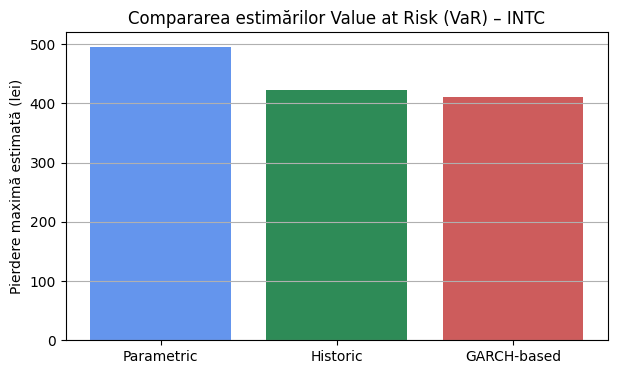

In [44]:
import numpy as np
from scipy.stats import norm

# Parametri generali
alpha = 0.05
investment = 10000 # lei
returns = data["LogReturn"].dropna()

mu = returns.mean()
sigma = returns.std()
z = norm.ppf(alpha)  # cuantila 5%
VaR_parametric = - (mu + z * sigma) * investment
print(f"1️⃣ VaR parametric (normal, 95%): {VaR_parametric:.2f} lei")

VaR_historical = - np.percentile(returns, alpha*100) * investment
print(f"2️⃣ VaR istoric (empiric, 95%): {VaR_historical:.2f} lei")

garch_var = var_forecast[0]  # din celula precedentă
garch_sigma = np.sqrt(garch_var)
VaR_garch = - (mean_forecast[0] + z * garch_sigma) * investment
print(f"3️⃣ VaR GARCH-based (95%): {VaR_garch:.2f} lei")

methods = ["Parametric", "Historic", "GARCH-based"]
values = [VaR_parametric, VaR_historical, VaR_garch]

import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.bar(methods, values, color=["cornflowerblue", "seagreen", "indianred"])
plt.title("Compararea estimărilor Value at Risk (VaR) – INTC")
plt.ylabel("Pierdere maximă estimată (lei)")
plt.grid(axis="y")
plt.show()


Au fost aplicate trei metode pentru calculul Value at Risk (VaR) la un nivel de încredere de 95%, considerând o investiție de 10.000 lei:

- VaR parametric (normal): 495,48 lei
– presupune distribuție normală a randamentelor → oferă o estimare teoretică a pierderii maxime zilnice.

- VaR istoric (empiric): 423,57 lei
– se bazează direct pe distribuția efectivă a datelor → reflectă mai bine comportamentul real al pieței.

- VaR GARCH-based: 410,84 lei
– ia în calcul volatilitatea variabilă estimată de modelul GARCH → adaptat la perioadele de instabilitate.

Interpretare:
Toate cele trei metode indică o pierdere maximă zilnică estimată între 410–500 lei, la o probabilitate de 5%.
Metoda GARCH oferă cea mai mică valoare, fiind mai sensibilă la scăderea recentă a volatilității.

Pe scurt: investiția de 10.000 lei în INTC ar putea suferi o pierdere maximă de aproximativ 4–5% într-o zi nefavorabilă, cu o probabilitate de 5%.

WARNING - (py.warnings._showwarnmsg) - /tmp/ipython-input-547194847.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  intc = yf.download("INTC", start="2020-01-01", end="2025-10-20")[["Close"]].rename(columns={"Close": "INTC"})

  intc = yf.download("INTC", start="2020-01-01", end="2025-10-20")[["Close"]].rename(columns={"Close": "INTC"})

[*********************100%***********************]  1 of 1 completed
WARNING - (py.warnings._showwarnmsg) - /tmp/ipython-input-547194847.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  amd = yf.download("AMD", start="2020-01-01", end="2025-10-20")[["Close"]].rename(columns={"Close": "AMD"})

  amd = yf.download("AMD", start="2020-01-01", end="2025-10-20")[["Close"]].rename(columns={"Close": "AMD"})

[*********************100%***********************]  1 of 1 completed


VaR portofoliu 95% (Parametric): 438.48 lei
VaR portofoliu 95% (Historic):   414.77 lei

Component VaR (Parametric, 95%):
      Weight  cVaR_abs_lei  cVaR_pct_%
INTC     0.6      264.0602     59.8474
AMD      0.4      177.1624     40.1526


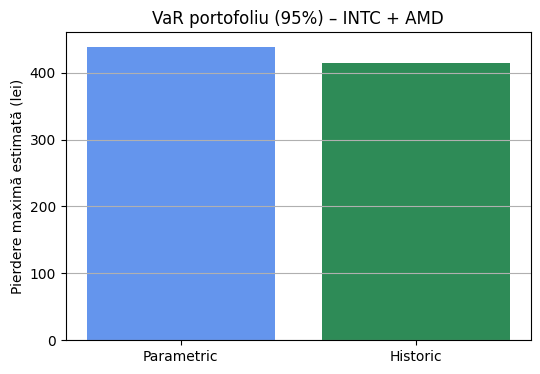

In [39]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt


intc = yf.download("INTC", start="2020-01-01", end="2025-10-20")[["Close"]].rename(columns={"Close": "INTC"})
amd = yf.download("AMD", start="2020-01-01", end="2025-10-20")[["Close"]].rename(columns={"Close": "AMD"})

prices = intc.join(amd, how="inner").dropna()
rets = np.log(prices / prices.shift(1)).replace([np.inf, -np.inf], np.nan).dropna()
w = np.array([0.6, 0.4])
labels = ["INTC", "AMD"]

r_p = rets.values @ w
alpha = 0.05
investment = 10000
z = norm.ppf(alpha)

mu_p = r_p.mean()
sigma_p = r_p.std(ddof=1)
VaR_param = - (mu_p + z * sigma_p) * investment
VaR_hist = - np.percentile(r_p, alpha * 100) * investment
print(f"VaR portofoliu 95% (Parametric): {VaR_param:.2f} lei")
print(f"VaR portofoliu 95% (Historic):   {VaR_hist:.2f} lei")

Sigma = rets.cov().values
sigma_p_cov = np.sqrt(w @ Sigma @ w)
marginal_VaR = (Sigma @ w) / sigma_p_cov
cVaR = (-z * investment) * (w * marginal_VaR)
cVaR_pct = cVaR / cVaR.sum() * 100

comp_table = pd.DataFrame({
    "Weight": w,
    "cVaR_abs_lei": cVaR,
    "cVaR_pct_%": cVaR_pct
}, index=labels)

print("\nComponent VaR (Parametric, 95%):")
print(comp_table.round(4))

# 8) Grafic comparativ
plt.figure(figsize=(6,4))
plt.bar(["Parametric","Historic"], [VaR_param, VaR_hist], color=["cornflowerblue","seagreen"])
plt.title("VaR portofoliu (95%) – INTC + AMD")
plt.ylabel("Pierdere maximă estimată (lei)")
plt.grid(axis="y")
plt.show()


Pentru această analiză s-a construit un portofoliu din acțiunile Intel (INTC) și AMD, două companii concurente din industria semiconductorilor, aflate în competiție directă pe piața procesoarelor și a cipurilor. Alegerea lor permite observarea efectului corelației pozitive moderate asupra riscului total al portofoliului.

Rezultate:

VaR parametric (95%): 438,48 lei

VaR istoric (95%): 414,77 lei

Aceste valori arată pierderea maximă estimată (cu 95% încredere) pentru o investiție de 10.000 lei.
De asemenea, analiza Component VaR arată contribuția fiecărei acțiuni la riscul total:

INTC (60%) contribuie cu ~60% din risc;

AMD (40%) contribuie cu ~40% din risc.

Interpretare:
Portofoliul prezintă un risc total mai mic decât suma riscurilor individuale, datorită diversificării.
Chiar dacă cele două acțiuni sunt din același sector, corelația lor nu este perfectă, ceea ce ajută la reducerea VaR-ului total.

Pe scurt: portofoliul mixt INTC–AMD este mai echilibrat și mai puțin riscant decât o investiție singulară în oricare dintre cele două acțiuni.